In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

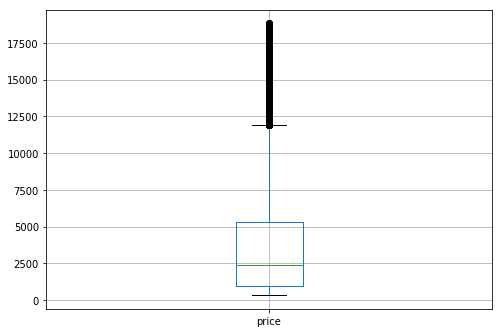

In [7]:

df = pd.read_csv(r'C:\Users\mfornaroli\Desktop\datasets\diamonds.csv', index_col=0)
df.price.plot(kind='box', grid=True, figsize=(8,5.5), legend=True)
# df.price.plot(kind='hist', grid=True)
# df.price.plot(kind='line', grid=True)


Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')


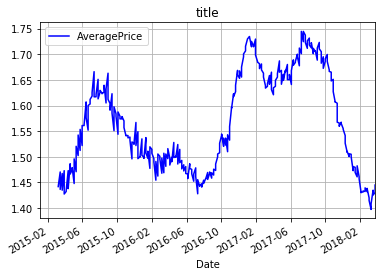

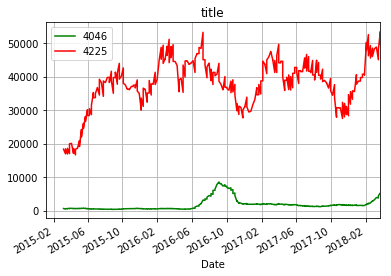

In [28]:
df = pd.read_csv(r"C:\Users\mfornaroli\Desktop\datasets\avocado.csv", index_col=0)
albany_df = df.copy()[df["region"]=='Albany']
albany_df.set_index('Date', inplace=True)
albany_df.index = pd.to_datetime(albany_df.index)
albany_df.sort_index(inplace=True)
print(albany_df.columns)
albany_df['AveragePrice'].rolling(20).mean().plot(grid=True, legend=True, color='blue', title = 'title')
albany_df[['4046', '4225']].rolling(20).mean().plot(grid=True, legend=True, color=['green', 'red'], title = 'title')


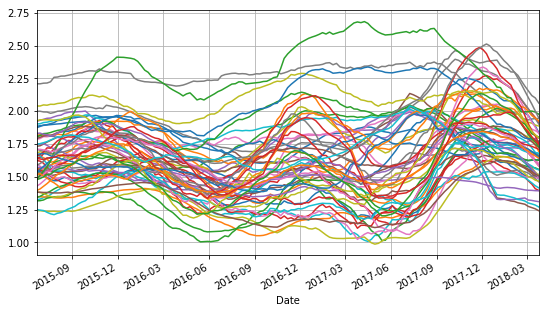

In [30]:
df = pd.read_csv(r"C:\Users\mfornaroli\Desktop\datasets\avocado.csv")
df = df.copy()[df["type"]=='organic']   # selezioniamo solo quelli di tipo organico

graph_df = pd.DataFrame()  # empty dataframe

for region in df["region"].unique():
#     print(' slecting data of region --> ',region)
    
    region_df = df.copy()[df["region"]==region]
    region_df.set_index('Date', inplace=True)
    region_df.index = pd.to_datetime(region_df.index)
    region_df.sort_index(inplace=True)
    # add line containing rolling average
    region_df[f'{region}_Price25avg'] = region_df["AveragePrice"].rolling(25).mean()
    
    # add it to the new dataframe. we can't use join when the df is empty! careful
    if graph_df.empty:
        graph_df = region_df[[f'{region}_Price25avg']]  # note: 2 parenthesis -> dataframe, one -> pd.series
    else:
        graph_df = graph_df.join(region_df[f'{region}_Price25avg'])
graph_df.dropna().plot(figsize=(9,5), legend=False, grid=True)

for state U.S. Virgin Islands we have -->  11    Nan values


for state Alabama we have -->  0.0   average     (no data)
for state Louisiana we have -->  0.0   average     (no data)
for state Mississippi we have -->  0.0   average     (no data)
for state South Carolina we have -->  0.0   average     (no data)
for state Tennessee we have -->  0.0   average     (no data)
['Al', 'Ar', 'Ca', 'Co', 'Co', 'De', 'Di', 'Fe', 'Gu', 'Ha', 'Id', 'In', 'Ke', 'Ma', 'Ma', 'Ma', 'Mi', 'Mi', 'Ne', 'Ne', 'Ne', 'Ne', 'Ne', 'Ne', 'No', 'No', 'Oh', 'Ok', 'Or', 'Pe', 'Pu', 'Rh', 'So', 'Ut', 'Ve', 'Wa', 'We', 'Wi', 'Wy']


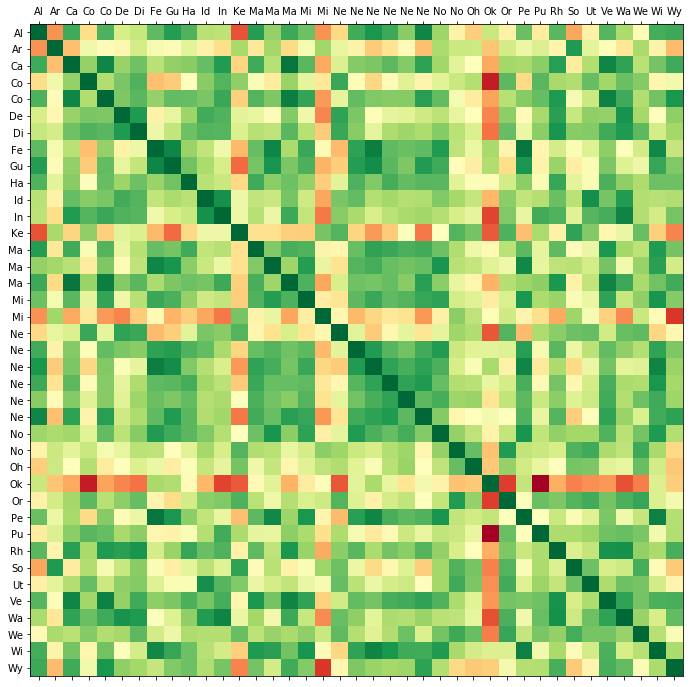

In [33]:
# Minimum Wage Data.csv
df = pd.read_csv(r"C:\Users\mfornaroli\Desktop\datasets\Minimum Wage Data.csv", encoding='latin')  #change the encoding
df.to_csv(r"C:\Users\mfornaroli\Desktop\datasets\MinimumWageData.csv", encoding='utf-8')  # save again, different encoding
df = pd.read_csv(r"C:\Users\mfornaroli\Desktop\datasets\MinimumWageData.csv")  # re read our df
df.head(3)
# Low2018 is the column we are interested in. actual values, normalized and everything... 
act_min_wage = pd.DataFrame()

for name, group in df.groupby("State"):
#     print('shape of the df we want to use', group.shape)
    if act_min_wage.empty:
        act_min_wage = group.set_index("Year")[["Low.2018"]].rename(columns={'Low.2018': name})
    else:
        act_min_wage = act_min_wage.join(group.set_index("Year")[["Low.2018"]].rename(columns={'Low.2018': name}))
for column in act_min_wage.columns:
    if act_min_wage[column].isna().sum() != 0:
        print("for state {}".format(column), "we have --> ", act_min_wage[column].isna().sum() , "   Nan values")
print("\n")        
for column in act_min_wage.columns:
    if act_min_wage[column].mean() == 0:
        print("for state {}".format(column), "we have --> ", act_min_wage[column].mean() , "  average     (no data)")
min_wage_corr = act_min_wage.replace(0, np.NaN).dropna(axis=1).corr()



labels = [c[:2] for c in min_wage_corr.columns]
print(labels)
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111) 
ax.matshow(min_wage_corr, cmap=plt.cm.RdYlGn)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
ax.set_xticklabels(labels)
plt.show()



Text(0.5,1,'minimum wage vs year - average')

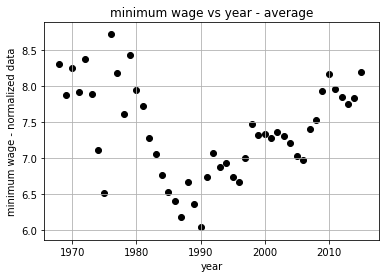

In [36]:
election_result = pd.read_csv(r"C:\Users\mfornaroli\Desktop\datasets\pres16results.csv")
unemp_rate = pd.read_csv(r"C:\Users\mfornaroli\Desktop\datasets\unEmpRate.csv")
act_min_wage = act_min_wage.replace(0, np.NaN).dropna(axis=1)
act_min_wage.shape
act_min_wage.head(2)
# act_min_wage.plot(legend=False, figsize=(10,6))
avg_min_wage_USA = []
for year in range(1968, 1968+48):
#     print(year)
    plt.scatter(year, act_min_wage.loc[year, :].mean(), color = 'black')
    avg_min_wage_USA.append(act_min_wage.loc[year, :].mean())
    year += 1
plt.grid()
plt.xlabel('year')
plt.ylabel('minimum wage - normalized data')
plt.title('minimum wage vs year - average')
# plt.legend('value')
# plt.show()

In [ ]:
def get_min_wage(year, state):
    try:
        return act_min_wage.loc[year][state]
    except:
        return np.NaN
    
print(get_min_wage(1980, "Alaska"))

import matplotlib.pyplot as plt
year = 1968
state = input("state: ")
for i in range(50):   
    plt.scatter(year, get_min_wage(year, state), color = 'g')
#     print(year, get_min_wage(year, state) )
    year += 1
plt.grid()
plt.xlabel('year')
plt.ylabel('minimum wage - normalized data')
plt.title('minimum wage vs year - ' + state)
# plt.legend('value')

(array([ 3.,  4.,  8.,  4., 15., 16., 13., 13.,  9.,  6.,  7.,  0.,  2.]),
 array([-65.80826482, -47.5645341 , -29.32080339, -11.07707267,
          7.16665804,  25.41038875,  43.65411947,  61.89785018,
         80.1415809 ,  98.38531161, 116.62904232, 134.87277304,
        153.11650375, 171.36023447]),
 <a list of 13 Patch objects>)

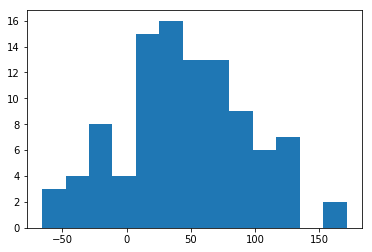

In [36]:
import random
import numpy as np
import matplotlib.pyplot as plt
# print(np.random.normal(50, 50, 100))
gaussian_distr = np.random.normal(50, 50, 100)
plt.hist(gaussian_distr, bins=13)

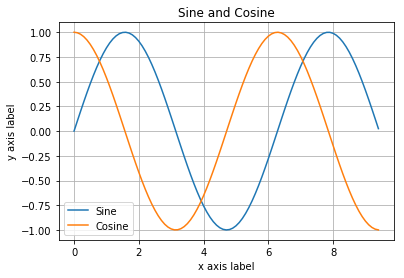

In [37]:
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)
# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.grid()
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])
plt.show()

<class 'numpy.ndarray'>
262144
(512, 512)


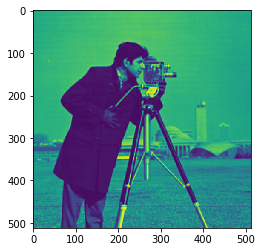

In [38]:
import skimage
from skimage import data
camera = data.camera()
print(type(camera))
print(camera.size)
print(camera.shape)
import matplotlib.pyplot as plt
plt.imshow(camera)

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')


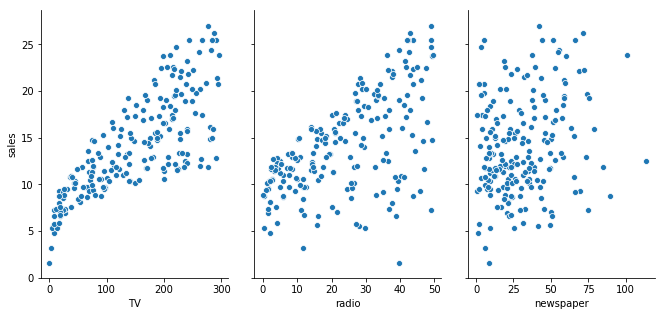

In [42]:
import pandas as pd
import seaborn as sns
data = pd.read_csv('http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv', index_col=0)
print(data.columns)
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', height=4.5, aspect=0.7)

   TYPE    EC
0  J38E  1350
1  J38E  1351
2  J38E  1315
3  J38E  1421
4  J38E  1413
5  J38E  1346
6  J38E  1137


(array([4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. , 8.5]),
 <a list of 10 Text yticklabel objects>)

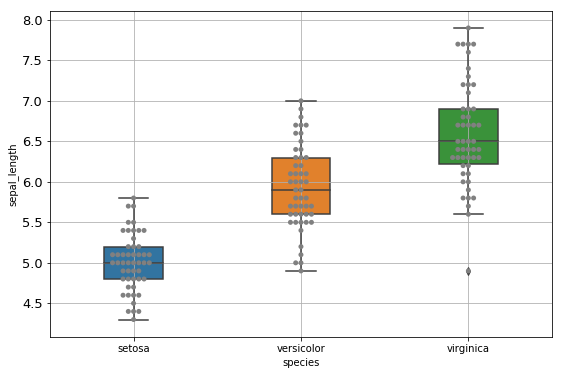

In [60]:
import seaborn as sns
df3 = sns.load_dataset('iris')
print(df.head(7))
# Usual boxplot
ax = sns.boxplot(x='species', y='sepal_length', data=df3, width=0.35)
# Add jitter with the swarmplot function.
ax = sns.swarmplot(x='species', y='sepal_length', data=df3, color="grey")
plt.grid()
plt.rcParams["figure.figsize"] = (9,6)
plt.yticks(fontsize=13)

C:\Users\Mfornaroli\Desktop\Turquoise_QualData\UM_metha1.5_data_EC-SSR-PL\file_EC.xlsx
C:\Users\Mfornaroli\Desktop\Turquoise_QualData\UM_metha1.5_data_EC-SSR-PL\file_EC.xlsx
['J38E' 'J39E']


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.]),
 <a list of 9 Text yticklabel objects>)

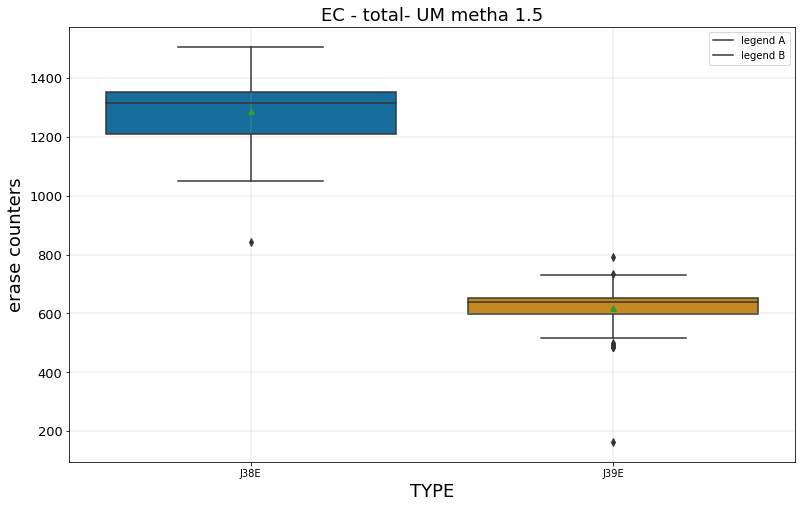

In [50]:
import seaborn as sn
filename = r"C:\Users\Mfornaroli\Desktop\Turquoise_QualData\UM_metha1.5_data_EC-SSR-PL\file_EC.xlsx"
print(filename)
print(filename)
df= pd.read_excel(filename)
# print(df.head(3))
print(df.TYPE.unique())
# df1 = df[df['TYPE'].isin(['ReadClaimCnt_Start','ReadClaimCnt_End'])]
# df1 = df[df['TYPE'].isin(['Pool_TLC_EcTOTAL','Pool_TLC_EcTLC', 'Pool_TLC_EcSLC'])]
df1 = df[df['TYPE'].isin(['J38E','J39E'])]
df1.head(n=7)

ax = sn.boxplot(x='TYPE', y='EC', 
                 data=df1, 
                 palette="colorblind",
#                   hue='TYPE',
#                  width = 0.87,
                  showmeans =True
                 )
plt.xlabel('TYPE', fontsize=18)
plt.ylabel('erase counters', fontsize=18)
plt.title('EC - total- UM metha 1.5', fontsize=18)
plt.grid(linewidth=0.3)
plt.legend(['legend A', 'legend B'])
plt.rcParams["figure.figsize"] = (13,8)
plt.yticks(fontsize=13)
# ax.legend(['J38E', 'J39E'])
# ax = sn.swarmplot(x='TYPE', y='EC', data=df1)    crasha se abbiamo troppi punti ... 

abbiamo --> 3 classi


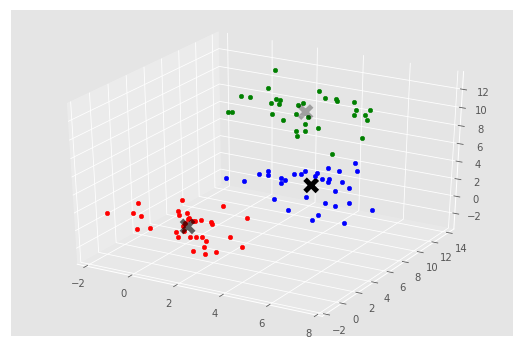

In [64]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
style.use('ggplot')
centers = [[1,1,1],[5,5,5],[3,10,10]]
X, y = make_blobs(n_samples=100, centers=centers, cluster_std=1.5)
ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters = len(np.unique(labels))
print("abbiamo --> {} classi".format(n_clusters))
colors = 100*['r', 'b', 'g']

# plot:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(X)):
    ax.scatter(X[i][0], X[i][1], X[i][2], c=colors[labels[i]], marker='o')
# plt.show()
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], cluster_centers[:,2], marker='x', color='k', s=150, linewidth=5, zorder=10)

{'b': [[1, 2], [2, 3], [3, 1]], 'r': [[6, 5], [7, 7], [8, 6]]}


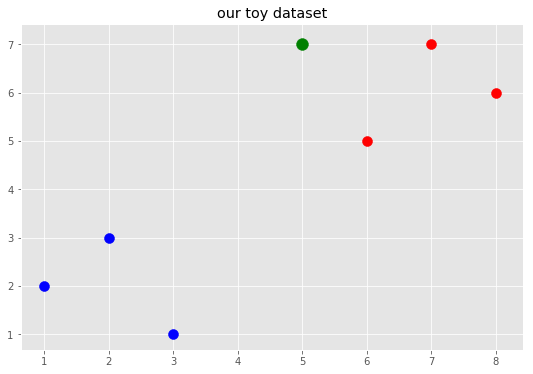

In [69]:
dataset = dict(zip(['b', 'r'], [[[1,2], [2,3], [3,1]], [[6,5],[7,7],[8,6]]]))
print(dataset)
new_feature = [5,7]
# let's plot our data
for i in dataset: # this corresponds to the key
    for ii in dataset[i]:    # these are elements associated to the key (class)
        plt.scatter(ii[0], ii[1], s=100, color=i)
plt.title('our toy dataset')
plt.scatter(new_feature[0], new_feature[1], color='g', s=140)